## 1. Importing libraries

In [498]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linear_model
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import colorama
from colorama import Fore, Style

### Loading and reviewing the data

In [457]:
data=pd.read_csv("Downloads/Bank_Personal_Loan_Modelling.csv")
print(data.shape) # Number of rows and columns in the dataframe
print(data.isnull().values.any()) # To check for null values in the dataframe
print(data.info()) # To check the data type of the columns of the dataframe
print(data.describe()) # To review the statistical summary of the dataframe
'''It is found that the minimum experience is a negative number which is an incorrect value and hence needs to be dropped'''
index2drop = data[data['Experience']<0].index
print('Index to be dropped = ', index2drop)
data.drop(index2drop, axis=0, inplace=True)
print(data.describe()) # To review the change in statistical values of Experience column
print(data.nunique())
data.head()

(5000, 14)
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
                ID          Age   

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


## 2. Exploratory data analysis

#### Number of unique enteries in every column

In [392]:
data.nunique()

ID                    4948
Age                     44
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

#### ID's should be unique. Thus number of ID entries should be equal to 5000. This is not the case here and hence needs to be investigated futher. This has been done in the value counts cell.

#### Number of people with zero mortgage

In [393]:
non_zero_mort = data['Mortgage'].astype(bool).sum(axis=0) # Number of people with positive mortgage
print('Number of people with zero mortgage :', data['Mortgage'].count()-non_zero_mort)

Number of people with zero mortgage : 3422


#### Number of people with zero credit card spending per month

In [394]:
non_zero_CC = data['CCAvg'].astype(bool).sum() # Number of people with positive CC usage
print('Number of people with zero credit card spending per month:', data['CCAvg'].count()-non_zero_CC)

Number of people with zero credit card spending per month: 106


#### Value counts of all categorical columns

In [408]:
columns2stay = ['Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'] # Categorical columns
data2 = data.drop(data.columns.difference(columns2stay),1) # Making a dataframe with only categorical columns
# Value counts and skewness
skewness_ratio = 0.11 # Making a custom skewness ratio
for i in columns2stay:
    print(i)
    print(data2[i].value_counts(normalize=True))
    if data2[i].value_counts(normalize=True)[1]/data2[i].value_counts(normalize=True)[0]<skewness_ratio or data2[i].value_counts(normalize=True)[0]/data2[i].value_counts(normalize=True)[1] <skewness_ratio:
        print(Fore.RED + 'Skewed data')
        print(Style.RESET_ALL)


Personal Loan
0    0.902991
1    0.097009
Name: Personal Loan, dtype: float64
Skewed data

Securities Account
0    0.895715
1    0.104285
Name: Securities Account, dtype: float64
CD Account
0    0.938965
1    0.061035
Name: CD Account, dtype: float64
Skewed data

Online
1    0.597009
0    0.402991
Name: Online, dtype: float64
CreditCard
0    0.705942
1    0.294058
Name: CreditCard, dtype: float64


#### Univariate analysis - plotting histograms of all columns except ID and categorical variables

Univariate analysis



array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Experience'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'ZIP Code'}>],
       [<AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'CCAvg'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Mortgage'}>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

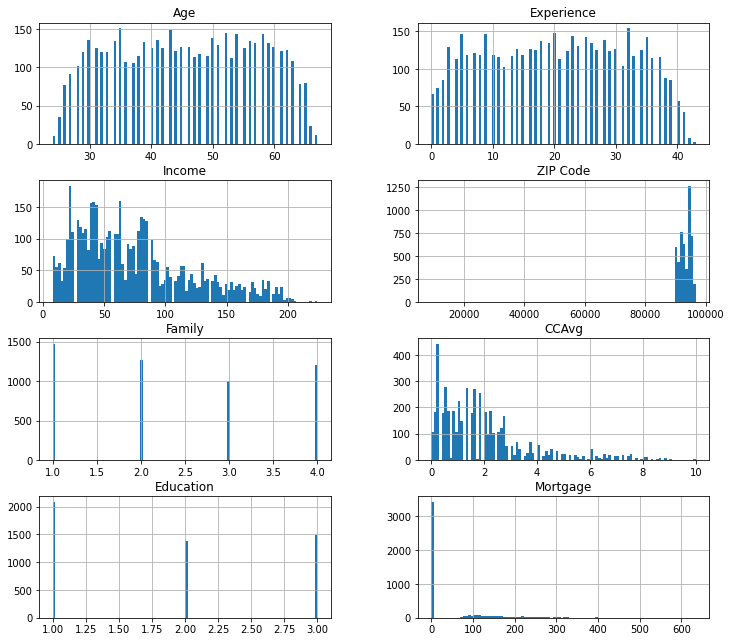

In [442]:
print('Univariate analysis\n')
cols = list(data)[1:-5]
data[cols].hist(stacked=False, bins=100, figsize=(12,40), layout=(14,2))

#### Bivariate analysis through correlation matrix

Bivariate analysis



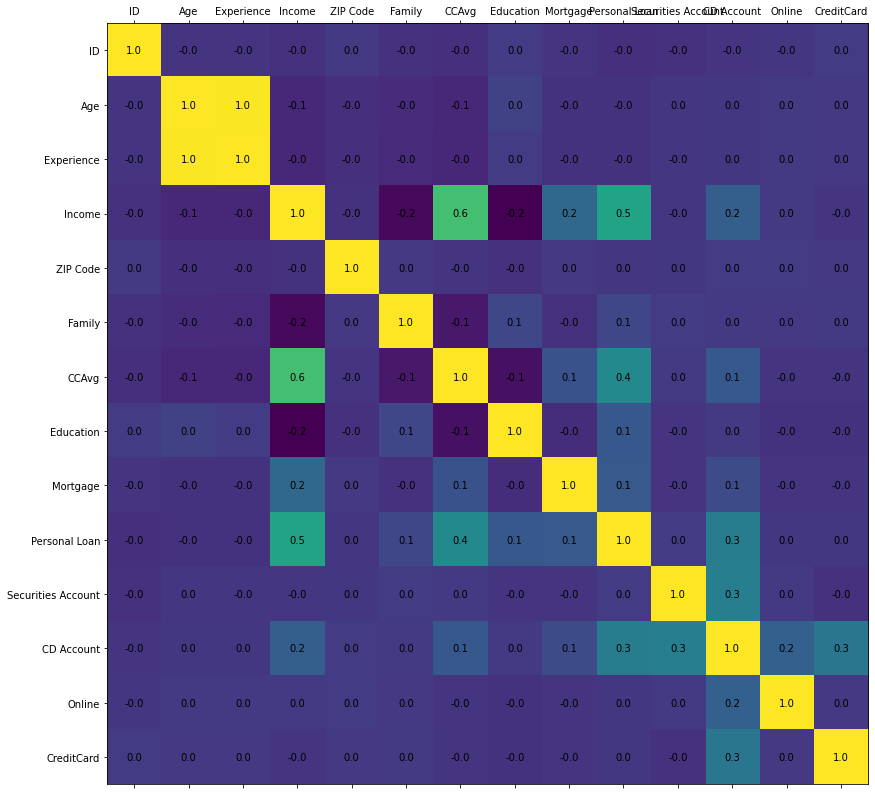

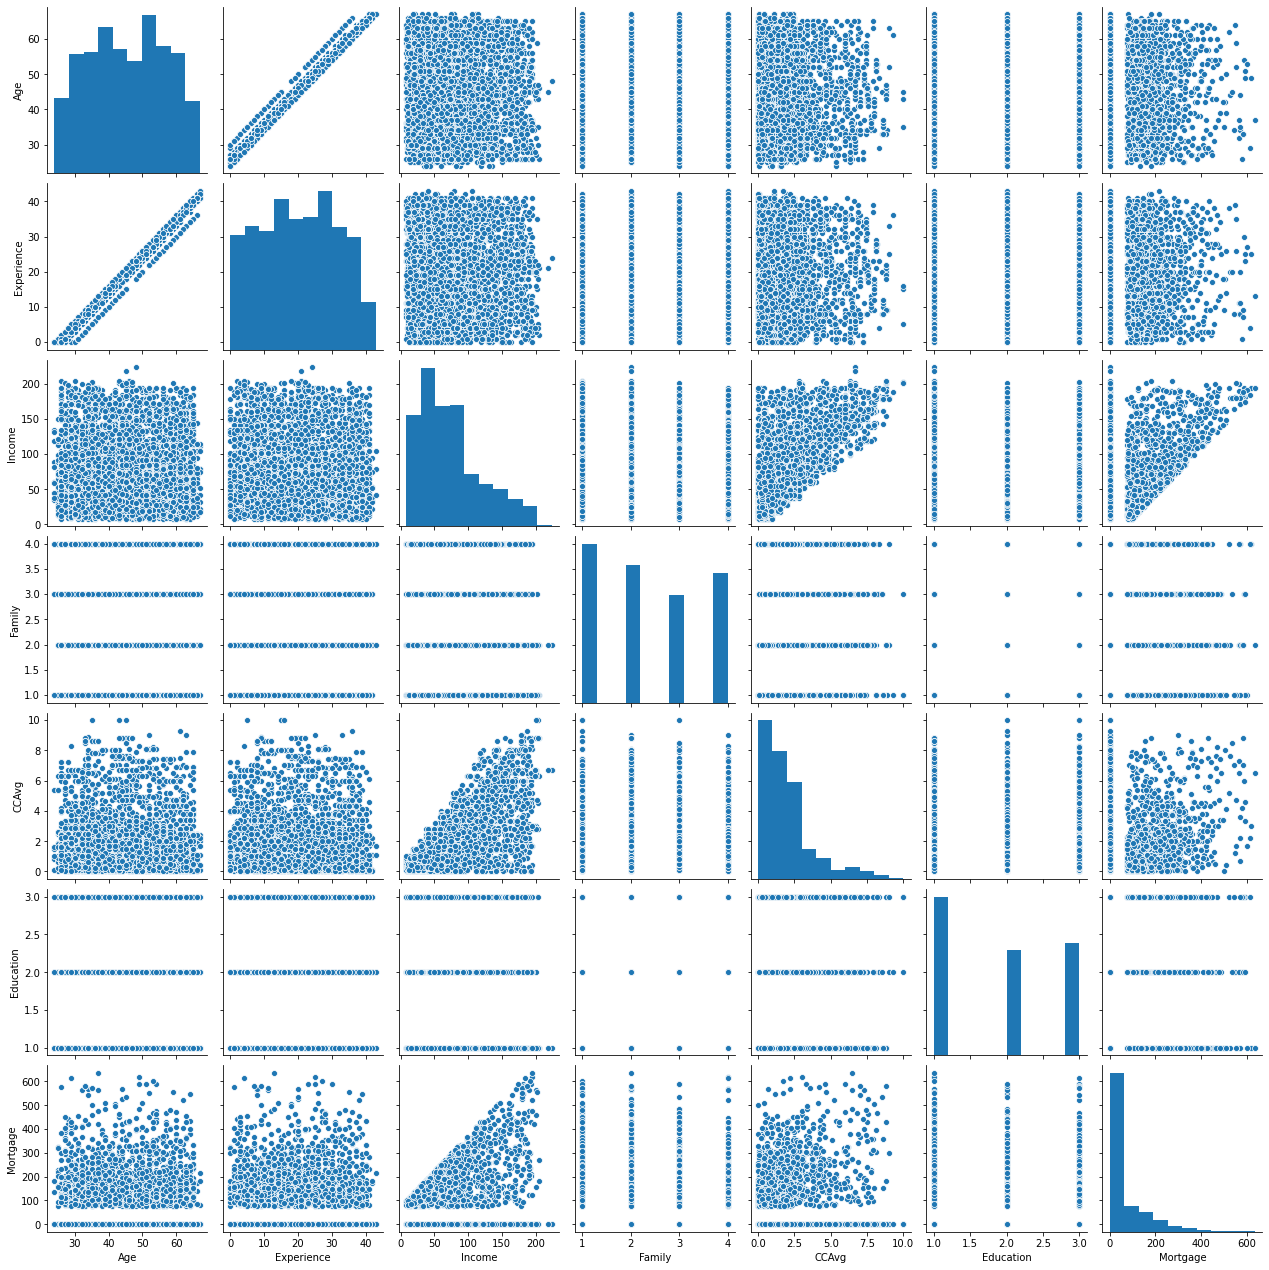

In [444]:
print('Bivariate analysis\n')
corr = data.corr()
fig, ax = plt.subplots(figsize=(14, 14))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
for (i, j), z in np.ndenumerate(corr):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
sns.pairplot(data[cols])

#### Check: model data is ready

In [402]:
# Check for missing values
boolean = data.isnull().values.any()
condition_count = 0
if boolean == False:
    condition_count +=1
    print('No missing values are present')
else:
    print('Missing values are present')

# Check for zero values where it does not make sense
if np.min(data['ID'])>0 and np.min(data['Age'])>0 and np.min(data['ZIP Code'])>0 and np.min(data['Family'])>0 and np.min(data['Education'])>0: 
    condition_count+=1
    print('No zero values where it does not make sense')
else:
    print('Replace zero values')

# Checking if model data is ready
if condition_count == 2:
    print('Hence, model data is ready')
else:
    print('Model data is not yet ready')

No missing values are present
No zero values where it does not make sense
Hence, model data is ready


## 3. Splitting, Training and Testing data

In [494]:
# Dropping ID, Mortgage and ZIP Code columns as they are not co-related to the Personal Loan categorical column
X = data.drop(['Personal Loan', 'ID', 'ZIP Code'], axis=1)
Y = data['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
print(x_train.head())
print("{0:0.2f}% data is in training set".format((len(x_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(data.index)) * 100))

      Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
1576   43          18      98       2    0.4          1         0   
2910   46          22     102       3    4.5          3         0   
3058   30           4     113       2    0.2          1         0   
1388   52          28      25       4    1.0          1         0   
2564   43          16      25       3    1.0          2         0   

      Securities Account  CD Account  Online  CreditCard  
1576                   0           0       1           0  
2910                   0           0       1           0  
3058                   0           0       1           0  
1388                   0           0       0           0  
2564                   0           0       1           0  
69.99% data is in training set
30.01% data is in test set


## 4. Logistic regression and prediction

0.9528619528619529
The accuracy score is :  0.9528619528619529
The sensitivity (True positive rate) of the data fit model is :  0.6644295302013423
The specificity (True negative rate) of the data fit model is :  0.9850299401197605
The precision score is :  0.8319327731092437
The F1score of the data fit model is : 0.7388059701492538


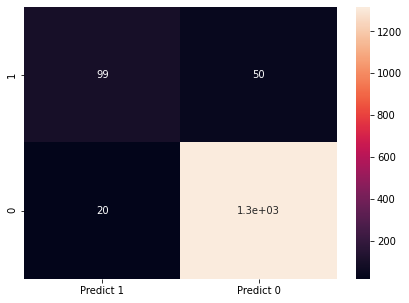

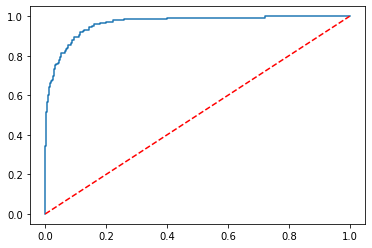

In [532]:
# model fitting
model = linear_model.LogisticRegression(random_state=42, penalty='l1',solver='liblinear', C=1) # newton-cg was tried and gave a partially better model score (usually used for multiclass problems)
y_train = y_train.astype(int) # Converting y_train values to int as float values are not excepted
y_test = y_test.astype(int) # Converting y_train values to int as float values are not excepted
model.fit(x_train, y_train)

# model score
y_predict = model.predict(x_test)
print(model.score(x_test, y_test))

# confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_conf_mat = pd.DataFrame(conf_mat, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_conf_mat, annot=True)

# printing all metrics to compute accuracy, sensitivity, specificity and precision of Logistic Regression
TP = df_conf_mat['Predict 1'][0]
TN = df_conf_mat['Predict 0'][1]
FP = df_conf_mat['Predict 1'][1]
FN = df_conf_mat['Predict 0'][0]
accuracy_score = (TP+TN)/(TP+TN+FP+FN)
print('The accuracy score is : ',accuracy_score)

sensitivity = (TP)/(TP+FN)
print('The sensitivity (True positive rate) of the data fit model is : ',sensitivity)

specificity = (TN)/(TN+FP)
print('The specificity (True negative rate) of the data fit model is : ',specificity)

precision = (TP)/(TP+FP)
print('The precision score is : ',precision)

F1score = 2*(precision*sensitivity)/(precision+sensitivity)
print('The F1score of the data fit model is :', F1score)

plt.figure()
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:, 1])
plt.plot(fpr, tpr, label='Logistic Regression (area= %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.savefig('Log_ROC')
plt.show()

#### Insight: The logistic regression model performance is quite good as can be seen from the graph. The value of auc is much higher than 0.5 indicating good fitting.

## 5. Effect of parameters on model performance

In [521]:
model.get_params()
train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model=LogisticRegression(random_state=42, penalty='l2', C=0.75, solver=i)
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    train_score.append(round(model.score(x_train,y_train), 3))
    test_score.append(round(model.score(x_test,y_test), 3))
    
print(solver)
print(train_score)
print(test_score)

solver2 = ['liblinear','saga']
train_score2=[]
test_score2=[]


print('Changing the penalty from l2 to l1')
for j in solver2:
    model2=LogisticRegression(random_state=42, penalty='l1', C=0.75, solver=j)
    model2.fit(x_train,y_train)
    y_predict2=model.predict(x_test)
    train_score2.append(round(model2.score(x_train,y_train), 3))
    test_score2.append(round(model2.score(x_test,y_test), 3))
    
print(solver2)
print(train_score2)
print(test_score2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
[0.952, 0.948, 0.95, 0.912, 0.909]
[0.949, 0.948, 0.95, 0.909, 0.905]
Changing the penalty from l2 to l1
['liblinear', 'saga']
[0.951, 0.909]
[0.952, 0.904]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


#### Insights
- Highest accuracy is obtained with penalty l1 for solver liblinear and with penalty l2 for solver newton-cg
Hence, one of them with their corresponding penalty should be chosen.

In [531]:
# Changing class weight
train_score=[]
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75, 1]
for i in C:
    model=LogisticRegression(random_state=42, solver='liblinear', penalty='l1',  C=i)
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    train_score.append(round(model.score(x_train,y_train), 3))
    test_score.append(round(model.score(x_test,y_test), 3))
    
print(C)
print(train_score)
print(test_score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[0.01, 0.1, 0.25, 0.5, 0.75, 1]
[0.918, 0.946, 0.949, 0.951, 0.951, 0.952]
[0.92, 0.95, 0.949, 0.952, 0.952, 0.953]


#### Insight
- Best testing and training accuracy is obtained for C = 0.75
Hence the final Logistic Regression model should be with C=1, solver='liblinear'

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')
Personal Loan         0         1
Age                              
24             1.000000  0.000000
25             1.000000  0.000000
26             0.831169  0.168831
27             0.868132  0.131868
28             0.911765  0.088235
29             0.875000  0.125000
30             0.875000  0.125000
31             0.944000  0.056000
32             0.900000  0.100000
33             0.875000  0.125000
34             0.865672  0.134328
35             0.894040  0.105960
36             0.850467  0.149533
37             0.924528  0.075472
38             0.895652  0.104348
39             0.954887  0.045113
40             0.936000  0.064000
41             0.941176  0.058824
42             0.888889  0.111111
43             0.899329  0.100671
44             0.884298  0.115702
45             0.897638  0.102362
46          

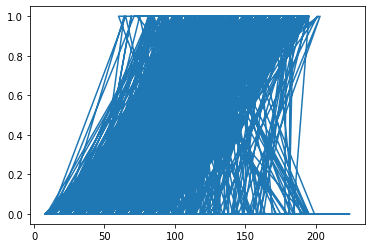

In [508]:
# Cross-tabulation of parameters with target variable - Personal loan
data3 = data.drop(['ID', 'ZIP Code', 'Personal Loan'], axis=1)
columns = data3.columns
print(columns)
for i in columns:
    print(pd.crosstab(data[i], data['Personal Loan'], normalize='index'))

plt.plot(data['Income'], data['Personal Loan'])

## 6. Business Understanding of the model

### Insights
- **ID, ZIP code** are unrelated variables and should be excluded from our analysis on the effect on model performance.
- In Categorical variables,
 - **CreditCard and Online variables** do not have significant effect on the **target variable (Personal Loan)** and hence can be dropped from the training and testing data. This is because in the cross-tabulation, the probability of the customer taking a personal loan is the same irrespective of them have a CreditCard or an Online account ([0.903 and 0.901] and [0.905 and 0.901] respectively).
 - **Securities Account** has a minor effect on the target variable (More than the aforementioned).
 - **CD Account** variable does have a significant effect on the target variable, reason being: If the customer has a CD account, he/she is 47% probable to take a personal loan, while if he/she doesnt have a CD account, he/she is only 0.07% probable to take a personal loan.
 - **Family** does have a minor effect on the target variable. With increasing members in the family, the probability of taking a personal loan increases.
 - **Education** also has a minor effect on the target variable. Graduates and advance professionals are more likely to take a personal loan as compared to an undergraduate person.

- In Continuous Variables,
 - **CCAvg** does have an effect on the target variable. A higher value of CCAvg increases the probability of them taking a personal loan.
 - **Age** and **Experience** which are highly corelated, also show an effect on the target variable.
 - **Mortgage** has a minor effect on the target variable.
 - **Income** has a strong influence on the target variable.
   
All these variables have also been removed one by one to see how it effects the model score-accuracy, precision, sensitivity, specificity and F1score to comment on their varying degree of effects on the target variable - Personal Loan.

**CONCLUSIONS**

- Customers who do have a CD Account should be targeted as there is a higher probablity of them taking out a personal loan as compared to those who do not have one.
- Customers who have a higher education above an undergraduate degree should be targeted as they have a higher probability of taking out a personal loan as compared to those with an undergraduate degree.
- Customers with a higher CCAvg should be targeted as those with higher values of this variable do have a higher probability of taking out a personal loan. It can be seen that higher credit card spending can mean a misbalance in income and expenditure, thus a need of a personal loan.
- Customers with a larger family should be targeted as it can be seen that with increasing number of family members, the probability of the customer taking a personal loan increases.
- Based on Income, Experience and Age, a fixed conclusion cannot be reached.